### 1-D random walk

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def random_walk(p, n):
    positions = np.zeros(n)

    for i in range(1, n):
        step = np.random.choice([-1, 1], p = [1-p, p])
        
        positions[i] = positions[i-1] + step
    return positions

Symmetric random walk (p=0.5):

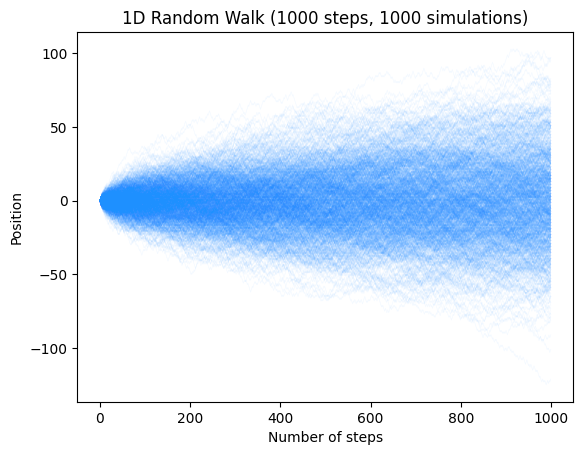

In [29]:
num_sims = 1000
n = 1000
p = 0.5

positions = np.zeros((num_sims, n))

for i in range(num_sims):
    positions[i] = random_walk(p, n)

steps = np.arange(0, n, 1)

for i in range(num_sims):
   plt.plot(steps, positions[i, :], color='dodgerblue', linewidth=0.5, alpha=0.05) 

plt.title(f'1D Random Walk ({n} steps, {num_sims} simulations)')
    
plt.xlabel('Number of steps')
plt.ylabel('Position')

plt.show()

Asymmetric random walk (p=0.25):

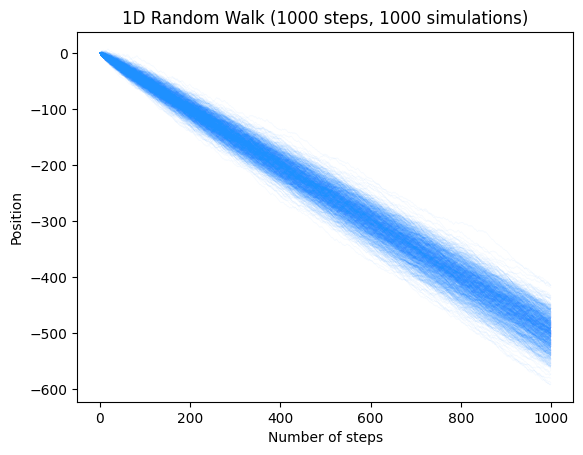

In [28]:
num_sims = 1000
n = 1000
p = 0.25

positions = np.zeros((num_sims, n))

for i in range(num_sims):
    positions[i] = random_walk(p, n)

steps = np.arange(0, n, 1)

for i in range(num_sims):
   plt.plot(steps, positions[i, :], color='dodgerblue', linewidth=0.5, alpha=0.05) 
    
plt.xlabel('Number of steps')
plt.ylabel('Position')

plt.title(f'1D Random Walk ({n} steps, {num_sims} simulations)')

plt.show()

### 2-D random walk

In [17]:
def random_walk_2d(p_up, p_down, p_right, p_left, n):
    x_positions = np.zeros(n)
    y_positions = np.zeros(n)

    possible_steps = np.array([
        [ 0,  1],
        [ 0, -1], 
        [ 1,  0],  
        [-1,  0] 
    ])
    probabilities = [p_up, p_down, p_right, p_left]
    
    for i in range(1, n):
        choice_index = np.random.choice(
            a=4, 
            p=probabilities
        )
        
        (dx, dy) = possible_steps[choice_index]
        
        x_positions[i] = x_positions[i-1] + dx
        y_positions[i] = y_positions[i-1] + dy
        
    return x_positions, y_positions

Symmetric random walk (p=0.25 for each direction):

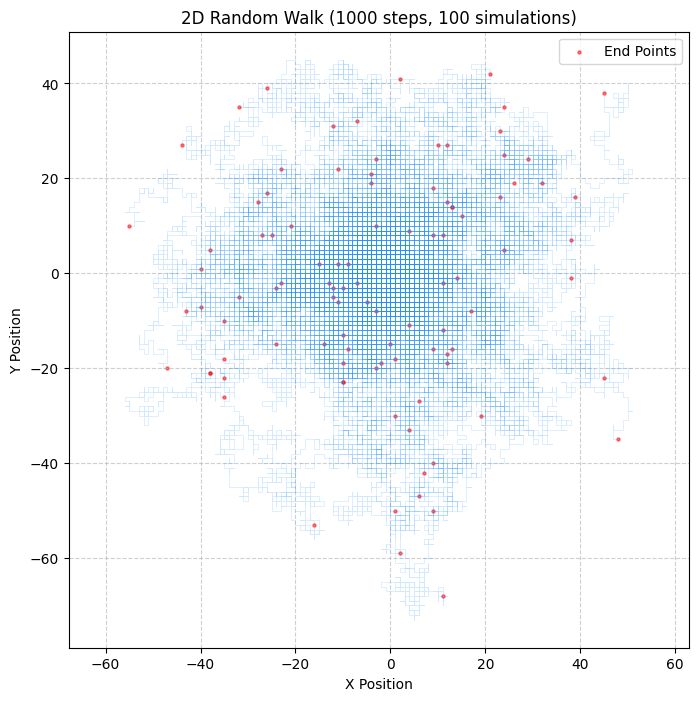

In [30]:
num_sims = 100
n = 1000
p_up, p_down, p_right, p_left = 0.25, 0.25, 0.25, 0.25

all_x_positions = np.zeros((num_sims, n))
all_y_positions = np.zeros((num_sims, n))

for i in range(num_sims):
    x_hist, y_hist = random_walk_2d(p_up, p_down, p_right, p_left, n)
    all_x_positions[i, :] = x_hist
    all_y_positions[i, :] = y_hist

plt.figure(figsize=(8, 8))

for i in range(num_sims):
    plt.plot(all_x_positions[i, :], all_y_positions[i, :], 
             color='dodgerblue', 
             linewidth=0.5, 
             alpha=0.2)
plt.scatter(all_x_positions[:, -1], all_y_positions[:, -1], 
            color='red', 
            s=5, 
            alpha=0.5, 
            label='End Points')

plt.title(f'2D Random Walk ({n} steps, {num_sims} simulations)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

### 3-D random walk:

In [31]:
def random_walk_3d(n):
    x_positions = np.zeros(n)
    y_positions = np.zeros(n)
    z_positions = np.zeros(n)

    possible_steps = np.array([
        [ 1,  0,  0], 
        [-1,  0,  0],  
        [ 0,  1,  0],
        [ 0, -1,  0],
        [ 0,  0,  1], 
        [ 0,  0, -1]
    ])
    
    probabilities = [1/6] * 6

    for i in range(1, n):
        choice_index = np.random.choice(
            a=6, 
            p=probabilities
        )
        
        (dx, dy, dz) = possible_steps[choice_index]
        
        x_positions[i] = x_positions[i-1] + dx
        y_positions[i] = y_positions[i-1] + dy
        z_positions[i] = z_positions[i-1] + dz
        
    return x_positions, y_positions, z_positions

Symmetric random walk in 3D:

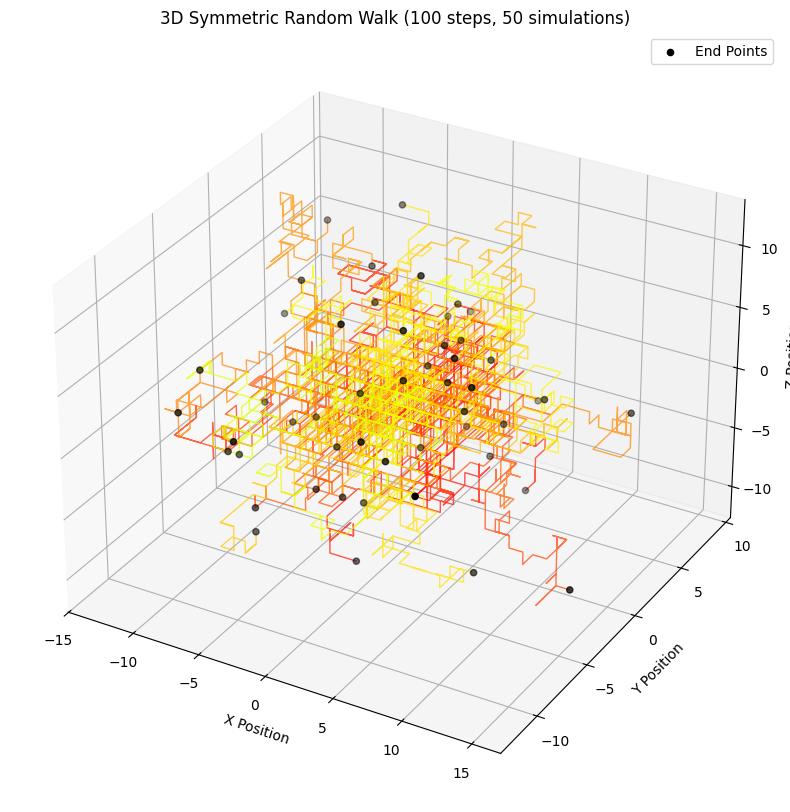

In [37]:
from mpl_toolkits.mplot3d import Axes3D 

num_sims = 50
n = 100

all_x_positions = np.zeros((num_sims, n))
all_y_positions = np.zeros((num_sims, n))
all_z_positions = np.zeros((num_sims, n))

for i in range(num_sims):
    x_hist, y_hist, z_hist = random_walk_3d(n)
    all_x_positions[i, :] = x_hist
    all_y_positions[i, :] = y_hist
    all_z_positions[i, :] = z_hist

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

colors = plt.colormaps["hsv"]

for i in range(num_sims):
    ax.plot(all_x_positions[i, :], all_y_positions[i, :], all_z_positions[i, :], 
            color=colors(i), 
            linewidth=1.0, 
            alpha=0.7)

ax.scatter(all_x_positions[:, -1], all_y_positions[:, -1], all_z_positions[:, -1], 
           color='black', 
           s=20, 
           label='End Points')

ax.set_title(f'3D Symmetric Random Walk ({n} steps, {num_sims} simulations)')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')

ax.legend()
plt.show()

### Gibbs sampling:

Using Gibbs sampling to sample from bivariate normal distribution (conditional distributions are also normal):

Set up Gibbs sampler:

In [65]:
def gibbs_sampler_bivariate_normal(mu_x, mu_y, sigma_x, sigma_y, rho, n_steps):
    sigma_x_cond = sigma_x * np.sqrt(1 - rho**2)
    sigma_y_cond = sigma_y * np.sqrt(1 - rho**2)
    
    beta_x_to_y = rho * (sigma_x / sigma_y)
    beta_y_to_x = rho * (sigma_y / sigma_x)
    
    chain = np.zeros((n_steps, 2))
    
    current_x = mu_x  
    current_y = mu_y
    
    for i in range(n_steps):
        mu_x_cond = mu_x + beta_x_to_y * (current_y - mu_y)
        new_x = np.random.normal(loc=mu_x_cond, scale=sigma_x_cond)
        mu_y_cond = mu_y + beta_y_to_x * (new_x - mu_x)
        new_y = np.random.normal(loc=mu_y_cond, scale=sigma_y_cond)
        chain[i] = [new_x, new_y]
        current_x = new_x
        current_y = new_y
        
    return chain

Define parameters of true distribution:

In [41]:
mu_x_true = 5.0
mu_y_true = 10.0
sigma_x_true = 2.0
sigma_y_true = 3.0
rho_true = 0.8

Sample data for 20000 steps and find sample mean and covariance:

In [42]:
n_steps = 20000
sampled_data = gibbs_sampler_bivariate_normal(
    mu_x=mu_x_true, 
    mu_y=mu_y_true, 
    sigma_x=sigma_x_true, 
    sigma_y=sigma_y_true, 
    rho=rho_true, 
    n_steps=n_steps
)

sampled_mean = np.mean(sampled_data, axis=0)
sampled_cov = np.cov(sampled_data, rowvar=False)

Compare sample and true means and covariances:

In [43]:
print(f"True Mean (X, Y): [{mu_x_true}, {mu_y_true}]")
print(f"True Covariance Matrix:\n {np.array([[sigma_x_true**2, rho_true*sigma_x_true*sigma_y_true], [rho_true*sigma_x_true*sigma_y_true, sigma_y_true**2]])}")
print(f"Sampled Mean (X, Y): {sampled_mean.round(2)}")
print(f"Sampled Covariance Matrix:\n {sampled_cov.round(2)}")

True Mean (X, Y): [5.0, 10.0]
True Covariance Matrix:
 [[4.  4.8]
 [4.8 9. ]]
Sampled Mean (X, Y): [ 5.02 10.04]
Sampled Covariance Matrix:
 [[3.97 4.72]
 [4.72 8.84]]


Create scatter plot of sampled data, overlayed with the first 200 steps:

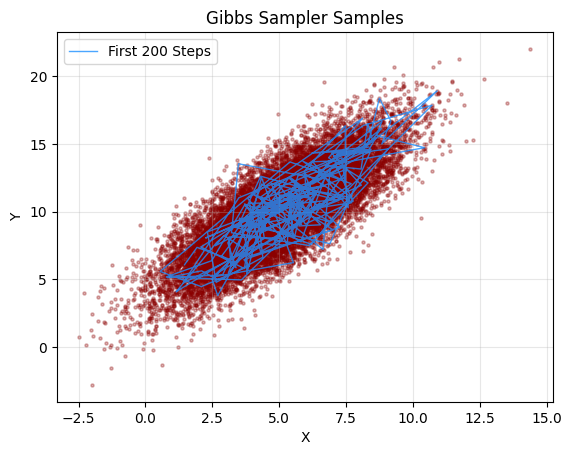

In [53]:
fig = plt.figure()
plt.scatter(sampled_data[:, 0], sampled_data[:, 1], s=5, alpha=0.3, color='darkred')
plt.plot(sampled_data[:200, 0], sampled_data[:200, 1], color='dodgerblue', alpha=0.8, linewidth=1, label='First 200 Steps')
plt.title('Gibbs Sampler Samples')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Display the next 300 steps:

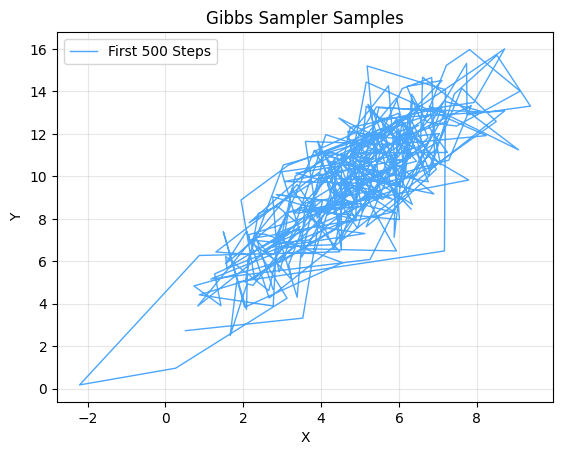

In [57]:
fig = plt.figure()
plt.plot(sampled_data[200:500, 0], sampled_data[200:500, 1], color='dodgerblue', alpha=0.8, linewidth=1, label='First 500 Steps')
plt.title('Gibbs Sampler Samples')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Create a histogram comparing the sampled X data to a true normal distribution:

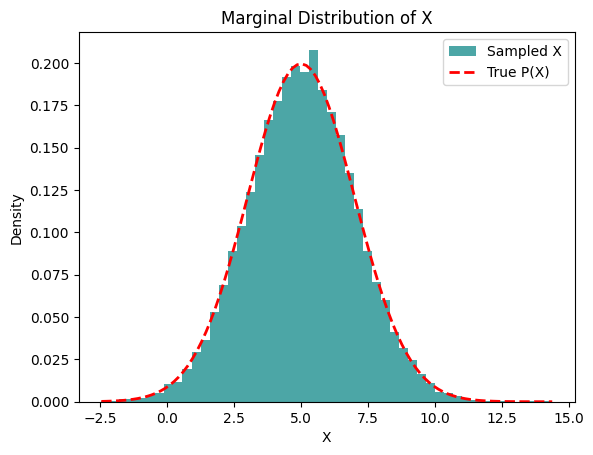

In [58]:
fig = plt.figure()
plt.hist(sampled_data[:, 0], bins=50, density=True, alpha=0.7, color='teal', label='Sampled X')
x_range = np.linspace(sampled_data[:, 0].min(), sampled_data[:, 0].max(), 100)
true_marginal_x = (1/(sigma_x_true * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_range - mu_x_true) / sigma_x_true)**2)
plt.plot(x_range, true_marginal_x, 'r--', linewidth=2, label='True P(X)')
plt.title('Marginal Distribution of X')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()
plt.show()

Do the same for the Y marginal distribution:

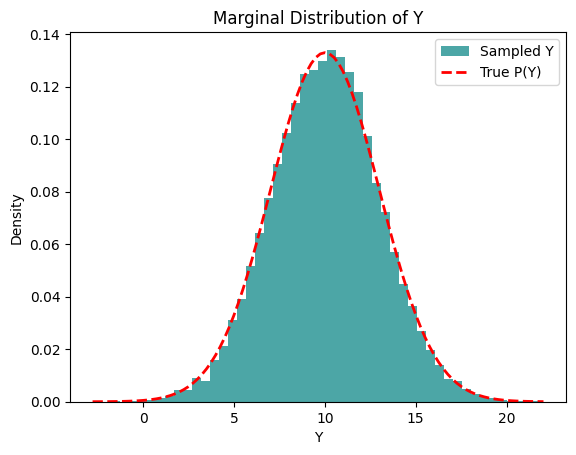

In [62]:
fig = plt.figure()
plt.hist(sampled_data[:, 1], bins=50, density=True, alpha=0.7, color='teal', label='Sampled Y')
y_range = np.linspace(sampled_data[:, 1].min(), sampled_data[:, 1].max(), 100)
true_marginal_y = (1/(sigma_y_true * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((y_range - mu_y_true) / sigma_y_true)**2)
plt.plot(y_range, true_marginal_y, 'r--', linewidth=2, label='True P(Y)')
plt.title('Marginal Distribution of Y')
plt.xlabel('Y')
plt.ylabel('Density')
plt.legend()
plt.show()

### Monte Carlo simulation

Using a Monte Carlo simulation to approximate the area of a circle inscribed in a square:

In [64]:
def get_distance(x, y):
    return np.sqrt(x**2+y**2)

In [71]:
def get_points(n, side_length):
    return np.random.uniform(low=-1*side_length, high=side_length, size=(n,2))

Simulate 10000 points, and use them to approximate pi:

In [74]:
n = 10000
side_length = 1
points = get_points(n, side_length)
num_in = 0
for point in points:
    if get_distance(point[0], point[1]) < side_length:
        num_in += 1

(num_in / n) * 4

3.1272

Plot points:

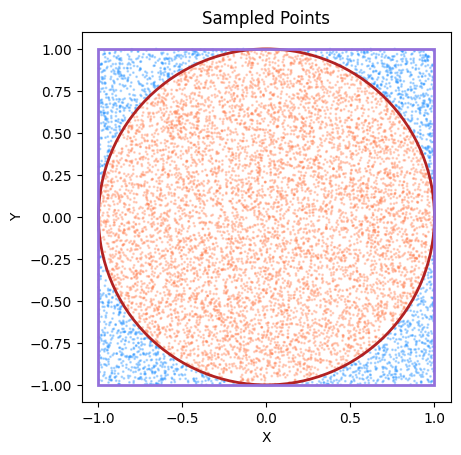

In [95]:
color_array = ["coral" if get_distance(point[0], point[1]) < side_length else "dodgerblue" for point in points ]
fig = plt.figure()
plt.scatter(points[:, 0], points[:, 1], s=1, alpha=0.3, color=color_array)
circle = plt.Circle((0, 0), 1, color='firebrick', fill = False, linewidth=2)
rectangle = plt.Rectangle((-1, -1), 2, 2, color='mediumpurple', fill = False, linewidth=2)
ax = plt.gca()
ax.add_patch(circle)
ax.add_patch(rectangle)
plt.title('Sampled Points')
plt.xlabel('X')
plt.ylabel('Y')
ax.set_aspect('equal', adjustable='box')
plt.show()